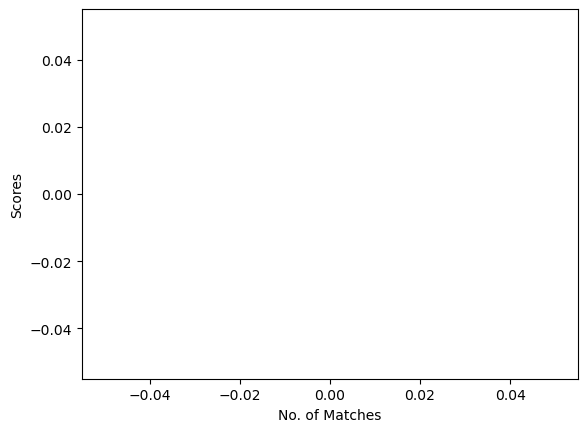

Table Created
Data Inserted


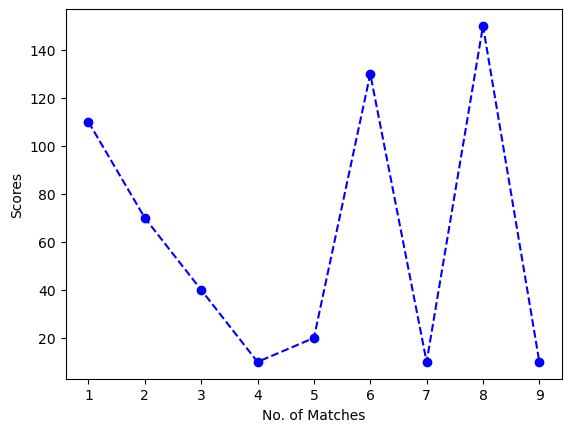

In [ ]:
import pygame
import os
import random
import tkinter.messagebox as MessageBox
import pymysql as sqlcon
from matplotlib import pyplot as plt
from tkinter import *

pygame.init()

mycon = sqlcon.connect(host="localhost", user="root", database="game_stats", passwd="root", charset='utf8')
score = 0

def create_database():
    try:
        mycur = mycon.cursor()
        qry = "CREATE DATABASE IF NOT EXISTS Game_Stats;"
        mycur.execute(qry)
    except Exception as e:
        print("Error:", e)

def use_database():
    try:
        mycur = mycon.cursor()
        mycur.execute("USE Game_Stats;")
    except Exception as e:
        print("Error:", e)

def create_table():
    try:
        mycursor = mycon.cursor()
        mycursor.execute("CREATE TABLE IF NOT EXISTS Game_Stats (Name VARCHAR(30) NOT NULL, Age INT(3) NOT NULL, Score INT NOT NULL);")
        print("Table Created")
    except Exception as e:
        print("Error:", e)

def insert_data(name, age, score):
    try:
        use_database()
        name = name.upper()
        age = int(age)
        data = (name, age, score)
        qry = "INSERT INTO Game_Stats (Name, Age, Score) VALUES (%s, %s, %s);"
        mycon.cursor().execute(qry, data)
        mycon.commit()
        print("Data Inserted")
    except Exception as e:
        print("Error:", e)

def gameloop(player_name, player_age):
    pygame.init()
    green = (1, 255, 23)
    red = (255, 0, 0)
    navy_blue = (0, 0, 23)
    newcolor = (12, 54, 255)
    screen_width = 900
    screen_height = 650
    gameWindow = pygame.display.set_mode((screen_width, screen_height))
    pygame.display.set_caption("Snake.py game")
    clock = pygame.time.Clock()
    font = pygame.font.SysFont(None, 30)

    def text_screen(text, color, x, y):
        screen_text = font.render(text, True, color)
        gameWindow.blit(screen_text, [x, y])

    def plot_snake(gameWindow, color, snk_list, snake_size):
        for x, y in snk_list:
            pygame.draw.rect(gameWindow, color, [x, y, snake_size, snake_size])

    exit_game = False
    game_over = False
    snake_x = 80
    snake_y = random.randrange(80, 600)
    score = 0
    velocity_x = 0
    velocity_y = 0
    snk_list = []
    snk_length = 1
    food_x = random.randint(20, screen_width / 2)
    food_y = random.randint(20, screen_height / 2)
    init_velocity = 5
    snake_size = 15
    fps = 60

    while not exit_game:
        if game_over:
            gameWindow.fill(green)
            text_screen("Game Over! Press Enter to Continue ", red, 300, 250)
            text_screen("Press other key to QUIT ", red, 300, 275)
            for event in pygame.event.get():
                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_RETURN:
                        insert_data(player_name, player_age, score * 10)
                        gameloop(player_name, player_age)
                else:
                    insert_data(player_name, player_age, score * 10)
                    exit_game = True
        else:
            mycursor = mycon.cursor()
            mycursor.execute("SELECT Name, Score FROM Game_Stats WHERE Score = (SELECT MAX(Score) FROM Game_Stats);")
            data = mycursor.fetchall()
            length = len(data)
            name_list = []
            score_list = []
            a = 0
            if length != 0:
                for i in range(length):
                    name_list.append(data[a][0])
                    score_list.append(data[a][1])
                    a += 1
                topscorer1 = name_list[0]
                topscorer2 = score_list[0]
            if length >= 2:
                secondtop1 = name_list[1]
                secondtop2 = score_list[1]

            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    exit_game = True
                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_RIGHT:
                        velocity_x = init_velocity
                        velocity_y = 0
                    if event.key == pygame.K_LEFT:
                        velocity_x = -init_velocity
                        velocity_y = 0
                    if event.key == pygame.K_UP:
                        velocity_y = -init_velocity
                        velocity_x = 0
                    if event.key == pygame.K_DOWN:
                        velocity_y = init_velocity
                        velocity_x = 0

            snake_x = snake_x + velocity_x
            snake_y = snake_y + velocity_y

            if abs(snake_x - food_x) < 10 and abs(snake_y - food_y) < 10:
                score += 1
                food_x = random.randint(20, screen_width - 300)
                food_y = random.randint(20, screen_height - 100)
                snk_length += 5

            gameWindow.fill(green)
            text_screen("Score: " + str(score * 10), newcolor, 5, 5)
            pygame.draw.rect(gameWindow, red, [food_x, food_y, snake_size, snake_size])

            if length != 0:
                if score < 20:
                    text_screen("Topscorer:" + str(topscorer1), newcolor, 600, 10)
                    text_screen("Highscore:" + str(topscorer2), red, 600, 40)
            if length >= 2:
                if score < 20:
                    text_screen("2ndtopScorer:" + str(secondtop1), newcolor, 600, 70)
                    text_screen("Highscore:" + str(secondtop2), red, 600, 100)

            if score >= 20 and score < 30:
                init_velocity = 6
                text_screen("Hard Mode Activated! Enjoy :)", red, 600, 5)
            elif score >= 30 and score < 40:
                init_velocity = 7
                text_screen("Hard Mode Activated! Enjoy :)", red, 600, 5)
            elif score >= 40:
                init_velocity = 8
                text_screen("Hard Mode Activated! Enjoy :)", red, 600, 5)

            head = []
            head.append(snake_x)
            head.append(snake_y)
            snk_list.append(head)

            if len(snk_list) > snk_length:
                del snk_list[0]

            if snake_x < 0 or snake_x > screen_width or snake_y < 0 or snake_y > screen_height:
                pygame.display.update()
                clock.tick(fps)
                game_over = True

            plot_snake(gameWindow, navy_blue, snk_list, snake_size)
        pygame.display.update()
        clock.tick(fps)

    pygame.quit()
    quit()

def show():
    use_database()
    cursor = mycon.cursor()
    cursor.execute("SELECT * FROM Game_Stats;")
    dat = cursor.fetchall()
    list1.delete(0, list1.size())
    list2.delete(0, list2.size())
    list3.delete(0, list3.size())
    c = len(dat)
    if c != 0:
        for i in range(len(dat)):
            list1.insert(list1.size(), dat[i][0])
            list2.insert(list2.size(), dat[i][1])
            list3.insert(list3.size(), dat[i][2])

def play_game():
    player_name = name1.get()
    player_age = age1.get()
    if player_name and player_age:
        create_database()
        use_database()
        create_table()
        gameloop(player_name, player_age)
        show()
    else:
        MessageBox.showinfo("Error", "Please enter your name and age")

def delete():
    delete_name = e_delete_name.get()
    del_age = e_delete_age.get()
    if not delete_name or not del_age:
        MessageBox.showinfo("Error!!!", "All Fields are required")
    else:
        use_database()
        cursor = mycon.cursor()
        cursor.execute("DELETE FROM Game_Stats WHERE Name=%s AND Age=%s", (delete_name, del_age))
        mycon.commit()
        show()
        MessageBox.showinfo("GG", "Record Deleted Successfully")

def making_graph():
    use_database()
    mycursor = mycon.cursor()
    nae = name1.get().upper()
    qry = "SELECT Name, Score FROM Game_Stats WHERE Name = %s;"
    mycursor.execute(qry, nae)
    dat = mycursor.fetchall()
    length = len(dat)
    score_list = []
    match_list = []
    a = 0
    for i in range(length):
        score_list.append(dat[a][1])
        match_list.append(a + 1)
        a += 1
    plt.plot(match_list, score_list, marker='o', linestyle='--', color='b')
    plt.xlabel("No. of Matches")
    plt.ylabel("Scores")
    plt.show()

def get_top_10():
    use_database()
    cursor = mycon.cursor()
    cursor.execute("SELECT * FROM Game_Stats ORDER BY Score DESC LIMIT 10;")
    data = cursor.fetchall()
    top.delete(0, top.size())
    if len(data) != 0:
        for i in range(len(data)):
            top.insert(top.size(), data[i])

root = Tk()
root.geometry("700x700")
root.title("Snakey")
root.configure(bg='olivedrab3')
root.resizable(False,False)

# to play game enter name and age buttons and labels
play_label = Label(root,text = "To Play Game", font = ("bold",15),relief = "raised", padx = 40,bg = "gray10",fg = "snow")
play_label.place(x = 50, y = 50)

name = Label(root, text="Name", font=("bold", 10),relief = "sunken",padx = 10,bg  = "ivory3",fg = "gray20")
name.place(x=30, y=100)
age = Label(root, text="Age", font=("bold", 10),relief = "sunken",padx = 10,bg  = "ivory3",fg = "gray20")
age.place(x=30, y=150)
name1 = Entry()
name1.place(x=100, y=100)
age1 = Entry()
age1.place(x=100, y=150)
play_btn = Button(root, text="Play", font=("italic", 15), bg="olivedrab4",fg = "white",padx = 10, command=play_game)
play_btn.place(x=100, y=220)

# Creating graph button
graph_btn = Button(root, text="Show Graph", font=("italic", 15), bg="olivedrab4",fg = "white",padx = 10, command=making_graph)
graph_btn.place(x=100, y=260)

# Creating and placing labels and listboxes for displaying database content

db_label = Label(root,text = "DataBase Content", font = ("bold",15),relief = "raised", padx = 40,bg = "gray10",fg = "snow")
db_label.place(x = 380, y = 400)

label1 = Label(root, text="Name", font=("bold", 10),relief = "sunken",padx = 10,bg  = "ivory3",fg = "gray20")
label1.place(x=350, y=450)
label2 = Label(root, text="Age", font=("bold", 10),relief = "sunken",padx = 10,bg  = "ivory3",fg = "gray20")
label2.place(x=450, y=450)
label3 = Label(root, text="Score", font=("bold", 10),relief = "sunken",padx = 10,bg  = "ivory3",fg = "gray20")
label3.place(x=550, y=450)

#to show the database 
list1 = Listbox(root, width=20, height=10)
list1.place(x=350, y=470)
list2 = Listbox(root, width=20, height=10)
list2.place(x=450, y=470)
list3 = Listbox(root, width=20, height=10)
list3.place(x=550, y=470)

# Deleting records
delete_label = Label(root,text = "To Delete Records", font = ("bold",15),relief = "raised", padx = 40,bg = "gray10",fg = "snow")
delete_label.place(x = 50, y = 400)

delete_name = Label(root, text="Name", font=("bold", 10),relief = "sunken",padx = 10,bg  = "ivory3",fg = "gray20")
delete_name.place(x=30, y=450)
delete_age = Label(root, text="Age", font=("bold", 10),relief = "sunken",padx = 10,bg  = "ivory3",fg = "gray20")
delete_age.place(x=30, y=500)
e_delete_name = Entry()
e_delete_name.place(x=100, y=450)
e_delete_age = Entry()
e_delete_age.place(x=100, y=500)
delete_btn = Button(root, text="Delete", font=("italic", 15),bg="olivedrab4",fg = "white",padx = 10, command=delete)
delete_btn.place(x=100, y=550)


# Displaying top 10 records
top_10_btn = Button(root, text="Top 10 Scorers", font=("italic", 15), bg="olivedrab4",fg = "white",padx = 10, command=get_top_10)
top_10_btn.place(x=420, y=50)
top = Listbox(root, width=50, height=10)
top.place(x=350, y=100)

root.mainloop()
